In [1]:
import pandas as pd
import os
r = 'D:\LABs\Diploma'
os.chdir(r)

In [2]:
# Read the first CSV file, skipping the first column
legit_1 = pd.read_csv('top-1m_0.csv', header=None, names=['domain'], usecols=[1])

# Read the second CSV file
legit_2 = pd.read_csv('top-1m_1.csv', header=None, names=['domain'])

# Concatenate the two DataFrames
result = pd.concat([legit_1, legit_2])

legit = result.drop_duplicates(subset='domain')

# Save the result to a new CSV file
result.to_csv('top-1m.csv', header=False, index=False)


In [3]:
import tldextract

legit.loc[:, 'primary'] = [tldextract.extract(d).domain for d in legit['domain']]
legit.loc[:, 'tld'] = [tldextract.extract(d).suffix.split('.')[0] for d in legit['domain']]

legit.columns = [['domain','primary','tld']]
legit['label'] = 'legit'
legit.to_csv('legit.csv', header=False, index=False)
legit.head()

C:\Users\Mark\AppData\Local\Temp\ipykernel_11684\366226314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legit.loc[:, 'primary'] = [tldextract.extract(d).domain for d in legit['domain']]
C:\Users\Mark\AppData\Local\Temp\ipykernel_11684\366226314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legit.loc[:, 'tld'] = [tldextract.extract(d).suffix.split('.')[0] for d in legit['domain']]
C:\Users\Mark\AppData\Local\Temp\ipykernel_11684\366226314.py:7: SettingWithCopyWarning: 
A value is trying to be se

,domain,primary,tld,label
0,google.com,google,com,legit
1,facebook.com,facebook,com,legit
2,a-msedge.net,a-msedge,net,legit
3,amazonaws.com,amazonaws,com,legit
4,microsoft.com,microsoft,com,legit


In [4]:
# Read the CSV file into a DataFrame
dga = pd.read_csv('dga-feed-high.csv', header=None, comment="#", dtype=str, names=['domain', 'description', 'date', 'url'])

dga = dga[['domain']]

# Display the first few rows of the modified DataFrame
dga.head()

,domain
0,edefnmjltumk.com
1,fqjrmepxlfve.net
2,fxthswijilec.biz
3,glytroovavnv.ru
4,glihnfjgwtfq.org


In [5]:
dga.loc[:, 'primary'] = [tldextract.extract(d).domain for d in dga['domain']]
dga.loc[:, 'tld'] = [tldextract.extract(d).suffix.split('.')[0] for d in dga['domain']]

dga.columns = [['domain','primary','tld']]
dga['label'] = 'dga'

# Save the modified DataFrame to a new CSV file
dga.to_csv('dga.csv', header=False, index=False)

dga.head()

,domain,primary,tld,label
0,edefnmjltumk.com,edefnmjltumk,com,dga
1,fqjrmepxlfve.net,fqjrmepxlfve,net,dga
2,fxthswijilec.biz,fxthswijilec,biz,dga
3,glytroovavnv.ru,glytroovavnv,ru,dga
4,glihnfjgwtfq.org,glihnfjgwtfq,org,dga


In [6]:
allDomains = pd.concat([legit, dga], ignore_index=True)
allDomains = allDomains.sample(frac=1).reset_index(drop=True)

allDomains.to_csv('allDomains.csv', header=False, index=False)

X, y = allDomains['tld'], allDomains['label']
allDomains.head()

,domain,primary,tld,label
0,tjxingyao.com,tjxingyao,com,legit
1,eikdxjdi.net,eikdxjdi,net,dga
2,ibobtoso.bazar,bazar,,dga
3,powercontrol.cloud,powercontrol,cloud,legit
4,teambodyproject.com,teambodyproject,com,legit


In [7]:
def process_row(row):
    domain_parts = row['domain'].split('.')
    if len(domain_parts) >= 2:
        row['primary'], row['tld'] = domain_parts[0], domain_parts[1]
    else:
        row['primary'], row['tld'] = '', ''
    return row

# Check for empty items in the 'tld' column and fix suffix presence
empty_tld_rows = allDomains.apply(lambda x: process_row(x) if x['tld'] == '' or pd.isnull(x['tld']) else x, axis=1)

# Output the rows with empty 'tld' column
empty_tld_rows.head()

,domain,primary,tld,label
0,tjxingyao.com,tjxingyao,com,legit
1,eikdxjdi.net,eikdxjdi,net,dga
2,ibobtoso.bazar,ibobtoso,bazar,dga
3,powercontrol.cloud,powercontrol,cloud,legit
4,teambodyproject.com,teambodyproject,com,legit


In [8]:
bazar = empty_tld_rows

bazar.to_csv('bazar.csv')

In [9]:
dga_set = bazar[['label','primary']]

print(dga_set.head())

   label          primary
0  legit        tjxingyao
1    dga         eikdxjdi
2    dga         ibobtoso
3  legit     powercontrol
4  legit  teambodyproject


In [10]:
# import necessary resources
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout
import sklearn
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [11]:
# build LSTM RNN model
def build_model(max_features, maxlen):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop')

    return model

In [36]:
# define LSTM RNN model training and testing function
def run_model(dga_set, max_epoch=50, batch_size=128):
    
    # extract data and labels 
    data = dga_set.values.tolist()
    X = [x[1] for x in data]
    labels = [x[0] for x in data]

    # generate a dictionary of valid characters
    valid_chars = {x:idx+1 for idx, x in enumerate(set(''.join(X)))}
    max_features = len(valid_chars) + 1
    maxlen = np.max([len(x) for x in X])

    # encode each domain
    X = [[valid_chars[y] for y in x] for x in X]
    X = sequence.pad_sequences(X, maxlen=maxlen)

    # convert labels to 0-1
    y = [0 if x == 'legit' else 1 for x in labels]

    final_data = []

    # split data into training and test data
    X_train, X_test, y_train, y_test, _, label_test = train_test_split(X, y, labels, 
                                                               test_size=0.2, random_state = 0)

    model = build_model(max_features, maxlen)

    # split training data again into training and validation data
    X_train, X_holdout, y_train, y_holdout = train_test_split(X_train, y_train, test_size=0.05,random_state = 0)
    best_iter = -1
    best_auc = 0.0
    out_data = {}

    # saving weights for sudden train interruption
    # if os.path.exists(checkpoint_path):
    #     model.load_weights(checkpoint_path)
    # elif os.path.exists("model_lstm.weights.h5"):
    #     model.load_weights("model_lstm.weights.h5")
    #     print("ok")

    for ep in range(max_epoch):
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        model.fit(X_train, y_train, batch_size=batch_size, epochs=1)

        t_probs = model.predict(X_holdout)
        t_auc = sklearn.metrics.roc_auc_score(y_holdout, t_probs)

        print ('Epoch %d: auc = %f (best=%f)' % (ep, t_auc, best_auc))

        if t_auc > best_auc:
            best_auc = t_auc
            best_iter = ep

            probs = model.predict(X_test)

            out_data = {'y':y_test, 'labels': label_test, 'probs':probs, 'epochs': ep,
                            'confusion_matrix': sklearn.metrics.confusion_matrix(y_test, probs > .5)}
            
            print ("confusion matrix on test data:")
            print (sklearn.metrics.confusion_matrix(y_test, probs > .5))
        else:
            # stop the process if performance has not improved for more than 2 epochs
            if (ep-best_iter) > 2:
                break

        final_data.append(out_data)

    return valid_chars, model, final_data

In [37]:
# get predictions and performance of LSTM model on test data
valid_chars, model_lstm, result_lstm = run_model(dga_set)

2321/2321 [==============================] - 16s 7ms/step
Epoch 0: auc = 0.997008 (best=0.000000)
11603/11603 [==============================] - 77s 7ms/step
confusion matrix on test data:
[[217819   1975]
 [  5426 146065]]
2321/2321 [==============================] - 17s 7ms/step
Epoch 1: auc = 0.998236 (best=0.997008)
11603/11603 [==============================] - 81s 7ms/step
confusion matrix on test data:
[[217616   2178]
 [  3391 148100]]
2321/2321 [==============================] - 16s 7ms/step
Epoch 2: auc = 0.998477 (best=0.998236)
11603/11603 [==============================] - 82s 7ms/step
confusion matrix on test data:
[[217863   1931]
 [  3079 148412]]
2321/2321 [==============================] - 16s 7ms/step
Epoch 3: auc = 0.998593 (best=0.998477)
11603/11603 [==============================] - 81s 7ms/step
confusion matrix on test data:
[[216586   3208]
 [  2090 149401]]
2321/2321 [==============================] - 17s 7ms/step
Epoch 4: auc = 0.998781 (best=0.998593)
11603/

In [ ]:
# save the lstm model
model_lstm.save('lstm_model.h5')

In [ ]:
model_lstm.save_weights("model_lstm.weights.h5")

In [ ]:
# save dictionary of valid characters in data set
import pickle
pkl_file = "valid_chars.pkl"  
with open(pkl_file, 'wb') as file:  
    pickle.dump(valid_chars, file)

In [49]:
result_lstm[-1]['confusion_matrix']

array([[217879,   1915],
       [  2396, 149095]], dtype=int64)

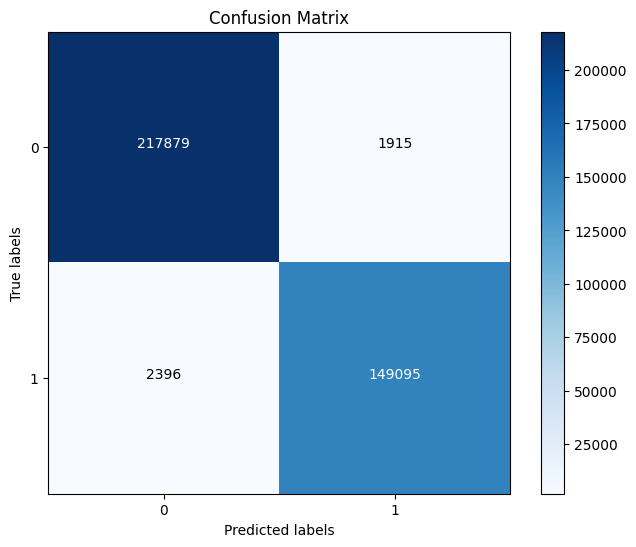

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the array
conf_matrix = np.array([[217879, 1915], [2396, 149095]])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Save the figure
plt.savefig('confusion_matrix_lstm.png')

plt.show()

In [13]:
model_lstm = keras.models.load_model('lstm_model.h5')

In [38]:
# get top 250 TLDs in data
top_tld = [tld[0] for tld in bazar['tld'].value_counts()[0:250].index.values]
top_tld

['com',
 'bazar',
 'net',
 'org',
 'xyz',
 'ru',
 'cn',
 'biz',
 'life',
 'co',
 'info',
 'top',
 'de',
 'su',
 'in',
 'pw',
 'cc',
 'io',
 'jp',
 'it',
 'nl',
 'fr',
 'eu',
 'gov',
 'pl',
 'edu',
 'online',
 'me',
 'site',
 'tv',
 'ir',
 'pro',
 'es',
 'buzz',
 'club',
 'ac',
 'cz',
 'ca',
 'kz',
 'ch',
 'us',
 'ro',
 'fun',
 'click',
 'shop',
 'tw',
 'win',
 'gr',
 'se',
 'to',
 'hosting',
 'hu',
 'tickets',
 'blackfriday',
 'feedback',
 'app',
 'be',
 'mx',
 'space',
 'so',
 'cl',
 'at',
 'live',
 'dk',
 'cloud',
 'vn',
 'fi',
 'bid',
 'ai',
 'sk',
 'no',
 'vip',
 'pt',
 'name',
 'nu',
 'ws',
 'xxx',
 'la',
 'ua',
 'casino',
 'bz',
 'by',
 'im',
 'sh',
 'tech',
 'id',
 'sc',
 'hk',
 'ms',
 'one',
 'mn',
 'cx',
 'store',
 'tj',
 'or',
 'mu',
 'sx',
 'ga',
 'go',
 'cm',
 'gob',
 'ug',
 'nf',
 'ki',
 'tk',
 'bit',
 'bg',
 'work',
 'bet',
 'ie',
 'icu',
 'rs',
 'lt',
 'link',
 'hr',
 'ne',
 'kr',
 'dev',
 'mobi',
 'az',
 'sbs',
 'gg',
 'xn--p1ai',
 'lol',
 'website',
 'lv',
 'si',
 'uz'

In [39]:
# perform one hot encoding on top 250 tld
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(top_tld)

# transform column tld1 of dga_cleaned
test = pd.DataFrame(lb.transform(bazar['tld']))

In [16]:
import pickle
# save labelbinarizer lb and top tld
pkl_file1 = "labelbinarizer.pkl"  
with open(pkl_file1, 'wb') as file:  
    pickle.dump(lb, file)
    
pkl_file2 = "top_tld.pkl"  
with open(pkl_file2, 'wb') as file:  
    pickle.dump(top_tld, file)

In [17]:
# concat two dataframe in order to use tld information as input for ensemble model
test.reset_index(drop=True, inplace=True)
bazar.reset_index(drop=True, inplace=True)
bazar = pd.concat( [bazar, test], axis=1) 

bazar.columns = [col[0] if isinstance(col, tuple) else col for col in legit.columns]
bazar.head()

,domain,primary,tld,label,0,1,2,3,4,5,...,240,241,242,243,244,245,246,247,248,249
0,tjxingyao.com,tjxingyao,com,legit,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,eikdxjdi.net,eikdxjdi,net,dga,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ibobtoso.bazar,ibobtoso,bazar,dga,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,powercontrol.cloud,powercontrol,cloud,legit,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,teambodyproject.com,teambodyproject,com,legit,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import pickle

pkl_file = "valid_chars.pkl"
with open(pkl_file, 'rb') as file:
    valid_chars = pickle.load(file)

# add a column named 'lstm_probs' from the predcition results of lstm model

dga_base = bazar[['label','primary']]
dga_base = dga_base.values.tolist()
X = [x[1] for x in dga_base]
maxlen = np.max([len(x) for x in X])

# Convert characters to int and pad
X = [[valid_chars[y] for y in x] for x in X]
X = sequence.pad_sequences(X, maxlen=maxlen)

# get predictions and concat the results to dataframe
lstm_probs = model_lstm.predict(X)
lstm_probs = pd.DataFrame(lstm_probs)
lstm_probs.columns = ['lstm_probs']
lstm_probs.reset_index(drop=True, inplace=True)
bazar.reset_index(drop=True, inplace=True)
bazar = pd.concat([bazar, lstm_probs], axis=1)

58014/58014 [==============================] - 439s 7ms/step


In [20]:
# prepare data for ensemble model

# drop useless columns
columns = ['domain','primary','tld']
bazar.drop(columns, inplace=True, axis=1)
bazar.head()

,label,0,1,2,3,4,5,6,7,8,...,241,242,243,244,245,246,247,248,249,lstm_probs
0,legit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000008
1,dga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.606417
2,dga,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
3,legit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000020
4,legit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000610


In [21]:
bazar.to_csv('probs.csv', header=False, index=False)

In [22]:
X = bazar.iloc[:, 1:]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,lstm_probs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000008
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.606417
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000020
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000610


In [23]:
y = bazar.iloc[:,0]
y.head()

0    legit
1      dga
2      dga
3    legit
4    legit
Name: label, dtype: object

In [24]:
# build ensemble model (use LR)
from sklearn.linear_model import LogisticRegression # type: ignore

bazar.rename(columns={'lstm_probs': 250}, inplace=True)

X = bazar.iloc[:, 1:]
y = bazar.iloc[:,0]

# split data into training and test data
# use random_state = 0 to keep same spliting result among three models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# fit the model
clf = LogisticRegression(random_state=0, multi_class='ovr', n_jobs = -1).fit(X, y)

# get prediction results
y_score = clf.predict_proba(X_test) 

In [25]:
# save the final model
import pickle
pkl_filename = "lrensemble_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [26]:
clf.score(X_test, y_test)

0.9923455027808826

In [27]:
y_test

935559     legit
1816063    legit
954294       dga
631513     legit
1173159      dga
           ...  
567284       dga
1806350    legit
48550      legit
77260        dga
1032994    legit
Name: label, Length: 371285, dtype: object

In [28]:
y_score

array([[1.28170528e-03, 9.98718295e-01],
       [6.66220406e-03, 9.93337796e-01],
       [9.98224778e-01, 1.77522193e-03],
       ...,
       [7.43596083e-04, 9.99256404e-01],
       [9.97573581e-01, 2.42641860e-03],
       [1.25866346e-03, 9.98741337e-01]])

In [29]:
# check performance of ensemble model on test data
# auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score[:,1])

0.99858925801079

In [30]:
# get confusion matrix of ensemble model
y_test1 = [0 if x == 'legit' else 1 for x in y_test]
lr_confusion = sklearn.metrics.confusion_matrix(y_test1, y_score[:,0] > .5)

In [31]:
lr_confusion

array([[218617,   1177],
       [  1665, 149826]], dtype=int64)

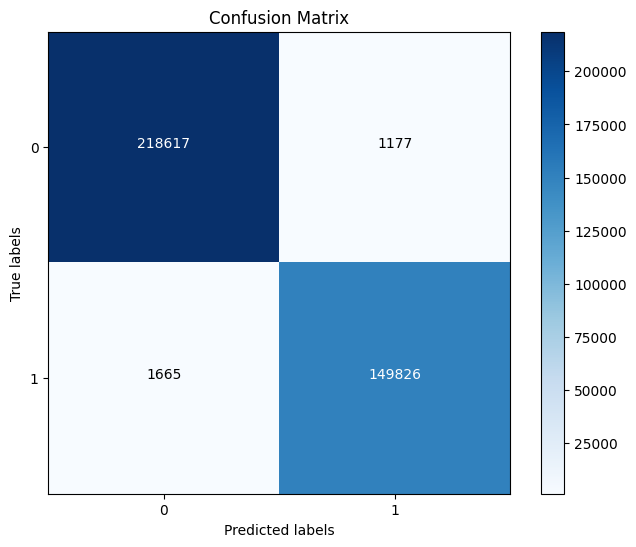

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the array
conf_matrix = np.array([[218617, 1177], [  1665, 149826]])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Save the figure
plt.savefig('confusion_matrix_Ensemble.png')

plt.show()

In [32]:
# import necessary resources
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve

In [51]:
# compare performance of three models
def plot_comparison(y_true,y_score_1,y_score_2, name_1, name_2, thre=0.5,save_name=None):

    fig = plt.figure(1,figsize=(5,5))

    precision1,recall1,thresholds1 = precision_recall_curve(y_true, y_score_1)
    precision2,recall2,thresholds2 = precision_recall_curve(y_true, y_score_2)
    
    plt.step(recall1, precision1, label=name_1, color='b', alpha=0.5,where='post')
    plt.step(recall2, precision2, label=name_2, color='r', alpha=0.5,where='post')
    
    ppoint1 = precision1[:-1][np.argmin(np.abs(thresholds1 - thre))]
    rpoint1 = recall1[:-1][np.argmin(np.abs(thresholds1 - thre))]
    plt.plot(rpoint1, ppoint1, 'bo', markersize=7, label='thre'+str(thre))
    
    ppoint2 = precision2[:-1][np.argmin(np.abs(thresholds2 - thre))]
    rpoint2 = recall2[:-1][np.argmin(np.abs(thresholds2 - thre))]
    plt.plot(rpoint2, ppoint2, 'ro', markersize=7, label='thre'+str(thre))
    
    
    # set start point of ylim and x lim to 0.9 since each of the three has an auc above 0.9
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.9, 1.00])
    plt.xlim([0.9, 1.00])
    plt.legend()
    plt.title('Precision Recall Curve')
    plt.show()
    if save_name: fig.savefig(save_name,bbox_inches='tight')

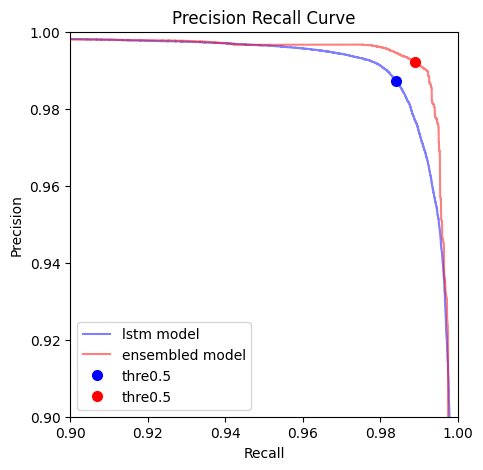

In [53]:
# plot performances of three models
plot_comparison(y_test1,  result_lstm[9]['probs'], \
                y_score[:,0], 'lstm model','ensembled model', save_name='Precision Recall Curve')

In [65]:
# detailed performance analysis function
def plot_performance(out_true,out_pred,save_name=None):
    
    # get output
    precision,recall,thresholds = precision_recall_curve(out_true,out_pred)
    fpr,tpr,_  = roc_curve(out_true,out_pred)
    
    # get roc curve
    fig = plt.figure(1,figsize=(18,3))
    plt.subplot(141)
    plt.plot(fpr,tpr, color='darkorange',lw=2,label='ROC (area = %0.3f)' % auc(fpr,tpr))
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title("ROC")
    plt.legend(loc="lower right")    
    
    # get precision and recall curve
    plt.subplot(142)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
    plt.title('Precision Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot((0,1),(0.5,0.5),'k--')
    
    # precision threshold
    plt.subplot(143)
    plt.scatter(thresholds, precision[:-1], color='k',s=1)
    plt.title('Precision Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.grid()
    plt.plot((0,1),(0.5,0.5),'k--')
    
    # get calibration curve
    plt.subplot(144)
    fraction_of_positives,mean_predicted_value = calibration_curve(out_true,out_pred,n_bins=5)
    plt.plot(mean_predicted_value,fraction_of_positives)
    plt.title('Calibration')
    plt.xlabel('Mean Predicted Value')
    plt.ylabel('Fraction of Positives')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.grid()
    plt.plot((0,1),'k--')
    plt.show()
    if save_name: fig.savefig(save_name,bbox_inches='tight')

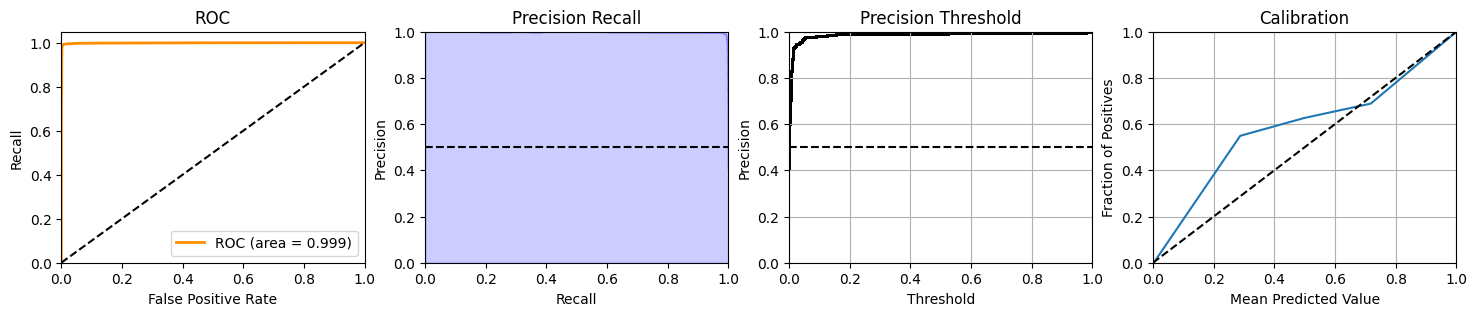

In [66]:
plot_performance(y_test1, y_score[:,0], save_name='performance analysis')